# Assignment 6 - Non linear drag

## Non linear drag

We consider the force of drag to be $\vec F_d = -\frac{1}2 \rho C_d A v^2 \hat v$, and the force accelerating the body downwards is $F_g = mg$. Thus $F_{net} = F_d + F_g = -\frac{1}2 \rho C_d A v^2 \hat v + mg$, and dividng through by mass, we get $\ddot x = g -\frac{1}{2m} \rho C_d A \dot x^2$. We will solve this differential equation using numerical integration. First, we consider a spherical solid object falling through glycerine, giving us $C_d = 0.5$ and $\rho = 1.26 \frac{\mbox{g}}{\mbox{cm}^3}$. The cross sectional area of a sphere will be $\pi r^2$, and we can consider various masses $m$

We can create a length scale in this differential equation $l = \frac{2m}{C_dA\rho}$. Thus, our final differential equation becomes
$$
    \ddot x = g - \frac{1}l \dot x^2
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

I've defined an extra function $L$ which takes in the mass of the object, it's cross sectional area, the density of the fluid, and the coefficient of drag and returns a value for $l$ which can be used in our differential equation

In [2]:
C_d = 0.47  # Coefficient of drag of sphere
rho = 1.26 # grams/cm^3
r   = 1    # 1 cm
m   = 1    # 1 gram
A   = np.pi * r**2
L = lambda m, c, a, r : 2*m/(c*a*r)
l_sphere = 2*m / (C_d * A * rho)
g = 9.81

We define the acceleration functions in terms of $x$ and $\dot x$, and an optional parameter for the length scale, which we will use later

In [3]:
def a(x,v,l=l_sphere):
    return g - 1/l * v**2

In [4]:
# Configuration Params
ti = 0
tf = 2
dt = 0.01
N = int((tf-ti)/dt)

# Data arrays
t = np.append([0],np.arange(dt/2,tf,dt))
x = np.zeros(N+1,float)
v = np.zeros(N+1,float)

# Initial Conditions
v0   = 0
x0   = 10
v[0] = v0
x[0] = x0

In [5]:
def integrate(t, l):
    N = len(t)
    x = np.zeros(N,float)
    v = np.zeros(N,float)
    for i in range(1, N):
        v[i] = v[i-1] + a(x[i-1],v[i-1], l) * dt
        x[i] = x[i-1] + v[i] * dt 
    
    return x, v

x_sphere, v_sphere = integrate(t, l_sphere)

Text(0, 0.5, 'Velocity')

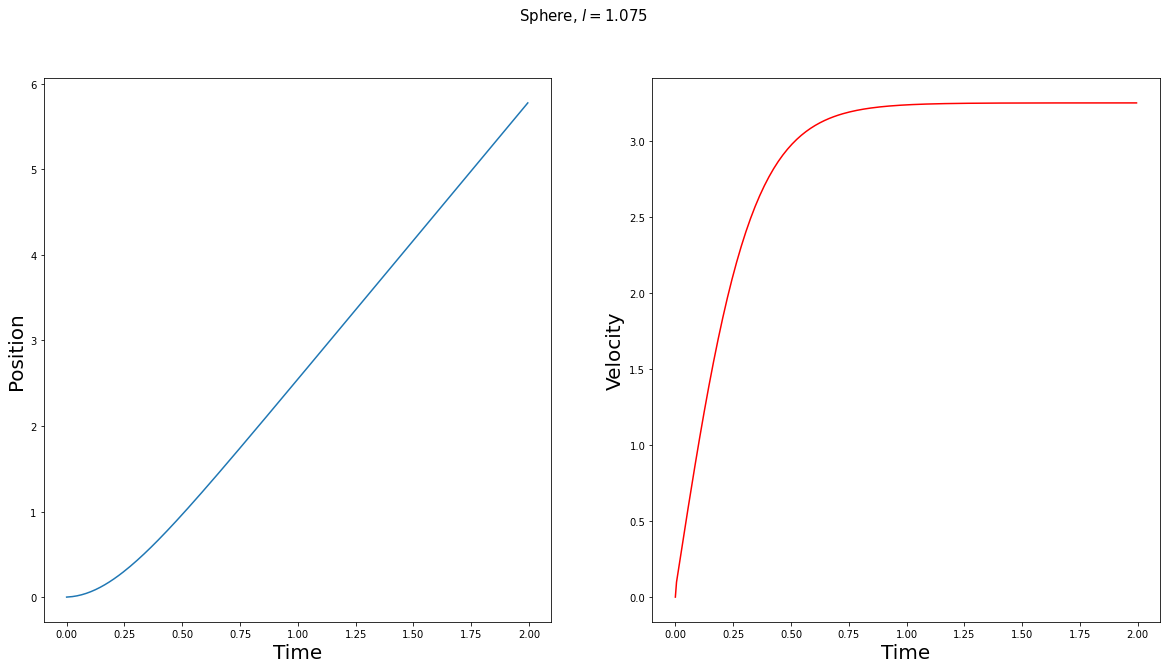

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches((20,10))
fig.suptitle("Sphere, $l = {}$".format(round(l_sphere,3)), fontsize=15)
pos_plot = ax1.plot(t,x_sphere,label="Position")[0]
vel_plot = ax2.plot(t,v_sphere,label="Velocity", color='red')[0]
ax1.set_xlabel('Time', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Position', fontsize=20)
ax2.set_ylabel('Velocity', fontsize=20)

So that sort of makes sense, since as soon as I drop something in glycerine, I expect the velocity to go down very quickly and it should fall at a steady rate basically, which is what the position versus time graph shows. We can pick different values for $l$ and animate that

In [7]:
lvals = np.linspace(0.01, 50, 25*3)
def update(i, pos_plt, vel_plot, N):
    _l = lvals[i]
    x = np.zeros(N+1, float)
    v = np.zeros(N+1, float)
    x, v = integrate(t, _l)
    
    fig.suptitle('l = {}'.format(_l))
    ax1.clear()
    ax1.plot(t,x)
    ax2.clear()
    ax2.plot(t,v,color='red')
    
    return pos_plot,vel_plot

In [8]:
ani = FuncAnimation(fig, update, interval=1000/25, frames=len(lvals), fargs=(pos_plot,vel_plot,N,))
HTML(ani.to_html5_video())

Doing the same for a cube and a cone, the coefficient of drag for a cube is $C_{d_{cube}} = 0.80$ and for a cone is $C_{d_{cone}} = 1.17$

In [9]:
C_d_cube = 1.15
C_d_cone = 0.50

l_cube = L(m, C_d_cube, A, rho) # = 0.631
l_cone = L(m, C_d_cone, A, rho) # = 0.431

In [10]:
x_cube = np.zeros(N+1, float)
v_cube = np.zeros(N+1, float)
x_cube, v_cube = integrate(t, l_cube)

Text(0.5, 0.98, 'Cube, $l = 0.631$')

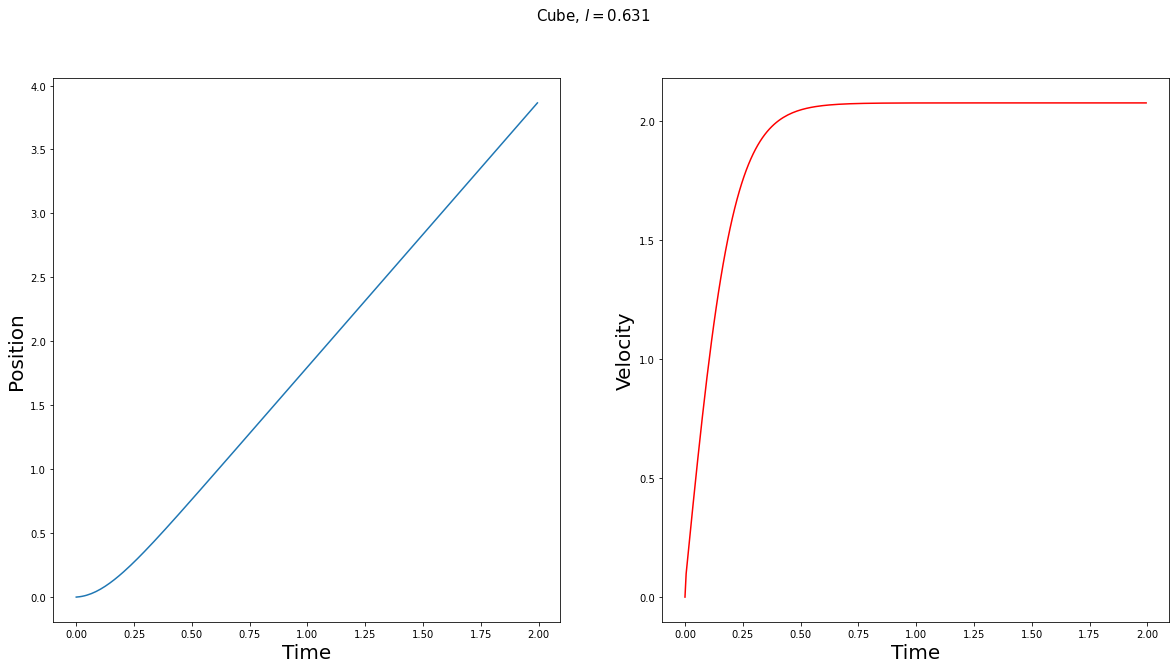

In [11]:
cube_fig, (cube_pos, cube_vel) = plt.subplots(1,2)
cube_fig.set_size_inches(20,10)
cube_pos_plot = cube_pos.plot(t,x_cube,label="Position")[0]
cube_vel_plot = cube_vel.plot(t,v_cube,label="Velocity", color='red')[0]
cube_pos.set_xlabel('Time', fontsize=20)
cube_vel.set_xlabel('Time', fontsize=20)
cube_pos.set_ylabel('Position', fontsize=20)
cube_vel.set_ylabel('Velocity', fontsize=20)
cube_fig.suptitle("Cube, $l = 0.631$", fontsize=15)

In [12]:
x_cone = np.zeros(N+1, float)
v_cone = np.zeros(N+1, float)
x_cone, v_cone = integrate(t, l_cone)

Text(0.5, 0.98, 'Cone, $l = 0.431$')

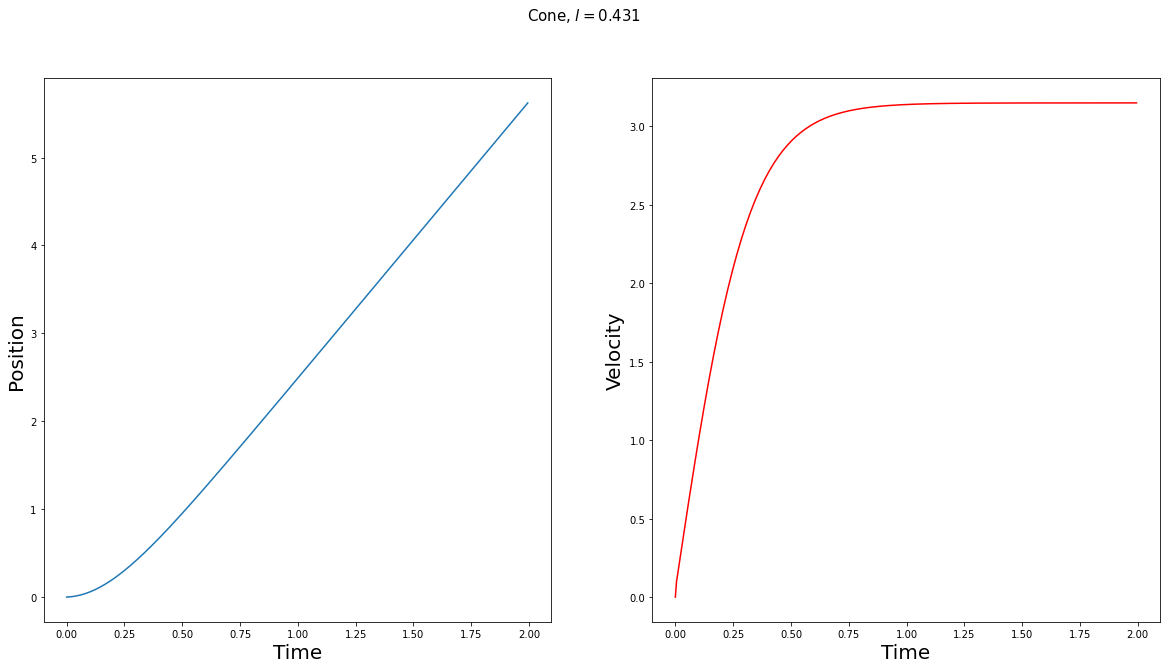

In [13]:
cone_fig, (cone_pos, cone_vel) = plt.subplots(1,2)
cone_fig.set_size_inches(20,10)
cone_pos_plot = cone_pos.plot(t,x_cone,label="Position")[0]
cone_vel_plot = cone_vel.plot(t,v_cone,label="Velocity", color='red')[0]
cone_pos.set_xlabel('Time', fontsize=20)
cone_vel.set_xlabel('Time', fontsize=20)
cone_pos.set_ylabel('Position', fontsize=20)
cone_vel.set_ylabel('Velocity', fontsize=20)
cone_fig.suptitle("Cone, $l = 0.431$", fontsize=15)

Since the scale of each graph is automatically set, they seem basically the same. However plotting the $(t,x)$ plots of all three on the same graph, we can see the distinctions. Note, I've called the `integrate` function here because when I used the variables `x_sphere`, `x_cube` and `x_cone`, they seemed to be equal to each other. I suspect that's an issue with how `integrate` is defined, however for now this seems to work

Text(0, 0.5, 'Position')

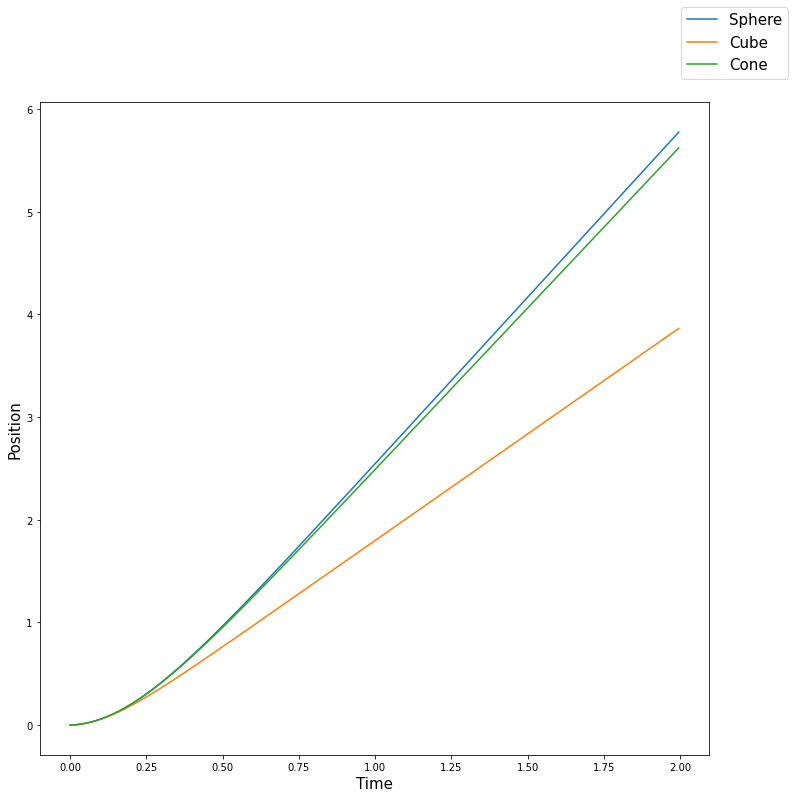

In [14]:
combined_fig, combined_ax = plt.subplots()
combined_fig.set_size_inches(12,12)
combined_ax.plot(t,integrate(t, l_sphere)[0], label="Sphere")
combined_ax.plot(t,integrate(t, l_cube)[0], label="Cube")
combined_ax.plot(t,integrate(t, l_cone)[0], label="Cone")
combined_fig.legend(prop={'size':15})
combined_ax.set_xlabel("Time", fontsize=15)
combined_ax.set_ylabel("Position", fontsize=15)

So assuming I haven't made a mistake, this makes me wonder why the cone travells less distance than the sphere. I would expect it to travel more since the shape is more aerodynamic